<a href="https://colab.research.google.com/github/ajayykumarr/main-project-1/blob/main/mask_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (100,100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 6947 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1/.255,)
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                                 target_size = (100,100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 600 images belonging to 2 classes.


In [ ]:
model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(100,100,3),
    pooling=None,
    classes=1000,
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
model.trainable = False

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(model)

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation ='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.1))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               4194432   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 27,782,273
Trainable params: 4,194,561
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
cnn.fit(x = training_set, validation_data=test_set, epochs =30)

Epoch 1/30
201/218 [==========================>...] - ETA: 1:39 - loss: 3.0224 - accuracy: 0.7300

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


218/218 [==============================] - 1496s 7s/step - loss: 2.8217 - accuracy: 0.7343 - val_loss: 0.4859 - val_accuracy: 0.7583
Epoch 2/30
218/218 [==============================] - 48s 219ms/step - loss: 0.4170 - accuracy: 0.7944 - val_loss: 0.3995 - val_accuracy: 0.8217
Epoch 3/30
218/218 [==============================] - 48s 219ms/step - loss: 0.4021 - accuracy: 0.7995 - val_loss: 0.3660 - val_accuracy: 0.8483
Epoch 4/30
218/218 [==============================] - 47s 215ms/step - loss: 0.3798 - accuracy: 0.8134 - val_loss: 0.3905 - val_accuracy: 0.8167
Epoch 5/30
218/218 [==============================] - 47s 218ms/step - loss: 0.3769 - accuracy: 0.8071 - val_loss: 0.3966 - val_accuracy: 0.8533
Epoch 6/30
218/218 [==============================] - 46s 213ms/step - loss: 0.3580 - accuracy: 0.8209 - val_loss: 0.3257 - val_accuracy: 0.8250
Epoch 7/30
218/218 [==============================] - 47s 215ms/step - loss: 0.3169 - accuracy: 0.8525 - val_loss: 0.3038 - val_accuracy: 0.87

In [ ]:
score = cnn.evaluate( test_set, verbose=0)
print("Model loss :" ,score[0])
print("Model accuracy :" ,score[1])

Model loss : 0.3530033230781555
Model accuracy : 0.878333330154419


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred = cnn.predict(test_set)
y_pred = y_pred > 0.5
y_pred = np.round(y_pred)
cm = confusion_matrix( test_set.classes, y_pred)
print(cm)
print(accuracy_score(test_set.classes, y_pred))

4/4 [==============================] - 2s 362ms/step
[[20 30]
 [19 31]]
0.51


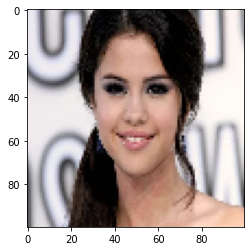

1/1 [==============================] - 0s 19ms/step
no mask


In [ ]:
import numpy as np
from keras.preprocessing import image

img_path = '/content/drive/MyDrive/Selena-Gomez-2010.webp'
img = tf.keras.utils.load_img(img_path, target_size=(100,100))
plt.imshow(img)
plt.show()

test_image = tf.keras.utils.load_img(img_path, target_size = (100,100))
#convert image format into array

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = ' mask'
else:
  prediction = 'no mask'

print(prediction)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [17]:
model.fit(x= training_set, validation_data= test_set, epochs= 20)

Epoch 1/20
 82/218 [==========>...................] - ETA: 34s - loss: 0.0643 - accuracy: 0.9764

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


218/218 [==============================] - 52s 238ms/step - loss: 0.0616 - accuracy: 0.9781 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 2/20
218/218 [==============================] - 47s 215ms/step - loss: 0.0611 - accuracy: 0.9780 - val_loss: 0.1160 - val_accuracy: 0.9583
Epoch 3/20
218/218 [==============================] - 48s 221ms/step - loss: 0.0636 - accuracy: 0.9771 - val_loss: 0.1199 - val_accuracy: 0.9533
Epoch 4/20
218/218 [==============================] - 47s 215ms/step - loss: 0.0566 - accuracy: 0.9791 - val_loss: 0.1170 - val_accuracy: 0.9650
Epoch 5/20
218/218 [==============================] - 48s 219ms/step - loss: 0.0477 - accuracy: 0.9843 - val_loss: 0.1345 - val_accuracy: 0.9600
Epoch 6/20
218/218 [==============================] - 46s 213ms/step - loss: 0.0476 - accuracy: 0.9843 - val_loss: 0.0616 - val_accuracy: 0.9817
Epoch 7/20
218/218 [==============================] - 47s 217ms/step - loss: 0.0745 - accuracy: 0.9742 - val_loss: 0.1926 - val_accuracy: 0.9

In [18]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [24]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_set)
y_pred = y_pred > 0.5
y_pred = np.round(y_pred)
report = classification_report( test_set.classes, y_pred)
print(report)

19/19 [==============================] - 3s 163ms/step
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       300
           1       0.52      0.58      0.55       300

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600



**NEW MODEL TRIED TODAY**

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 5s 0us/step


In [27]:
trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 rmalization)                   )                                                      

In [28]:
for layer in trained_model.layers:
  layer.trainable = False

last_layer = trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [29]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator =  test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 6947 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [31]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=5,
                              validation_steps=9,
                              verbose=1)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - 21s 1s/step - loss: 1.3285 - accuracy: 0.7513 - val_loss: 0.1260 - val_accuracy: 0.9444
Epoch 2/5
12/12 [==============================] - 14s 1s/step - loss: 0.1695 - accuracy: 0.9336 - val_loss: 0.1029 - val_accuracy: 0.9667
Epoch 3/5
12/12 [==============================] - 14s 1s/step - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.0261 - val_accuracy: 0.9889
Epoch 4/5
12/12 [==============================] - 15s 1s/step - loss: 0.1287 - accuracy: 0.9479 - val_loss: 0.0486 - val_accuracy: 0.9778
Epoch 5/5
12/12 [==============================] - 14s 1s/step - loss: 0.0837 - accuracy: 0.9648 - val_loss: 0.0489 - val_accuracy: 0.9833


Text(0.5, 1.0, 'Training and validation loss')

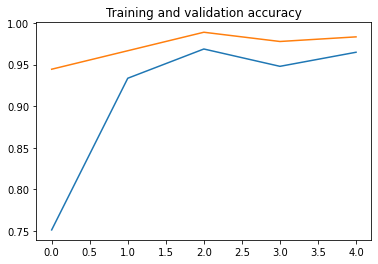

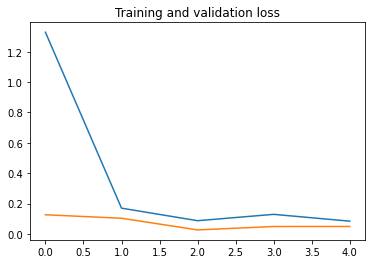

In [32]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )